<a href="https://colab.research.google.com/github/Nitheesh2001/NLP/blob/main/Univariate_time_series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [57]:
def prepare_data(timeseriesdata,n_features):
  x,y=[],[]
  for i in range(len(timeseriesdata)):
    end_ix=i+n_features
    if end_ix > len(timeseriesdata)-1:
      break
    seqx,seqy=timeseriesdata[i:end_ix],timeseriesdata[end_ix]
    x.append(seqx)
    y.append(seqy)
  return np.array(x),np.array(y)

In [58]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps=3

In [59]:
scaler=MinMaxScaler()
timeseries_data=np.array(timeseries_data)
timeseries_data=scaler.fit_transform(timeseries_data.reshape(-1,1)).flatten()

In [60]:
x,y=prepare_data(timeseries_data,n_steps)

In [61]:
print(x.shape)
print(y.shape)

(6, 3)
(6,)


In [62]:
n_featuers=1
x=x.reshape((x.shape[0],x.shape[1],n_featuers))

In [63]:
x.shape

(6, 3, 1)

In [64]:
model=Sequential([
    LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps,n_featuers)),
    Dropout(0.2),
    LSTM(50,activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [65]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [66]:
model.fit(x,y,epochs=300,verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.5160 - accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 0.5087 - accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 0.5093 - accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4962 - accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4891 - accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4833 - accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4755 - accuracy: 0.0000e+00
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4750 - accuracy: 0.0000e+00
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4659 - accuracy: 0.0000e+00
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4671 - ac

In [67]:
model.evaluate(x,y)

1/1 [==============================] - 1s 598ms/step - loss: 0.0020 - accuracy: 0.1667


[0.002034897217527032, 0.1666666716337204]

In [68]:
x_input=np.array([187,196,210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_featuers))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_featuers))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)




[2536.8142]
1 day input [ 196.          210.         2536.81420898]
1 day output [[3855.609]]
2 day input [ 210.         2536.81420898 3855.60888672]
2 day output [[10744.254]]
3 day input [ 2536.8142  3855.609  10744.254 ]
3 day output [[40967.836]]
4 day input [ 3855.609 10744.254 40967.836]
4 day output [[87546.3]]
5 day input [10744.254 40967.836 87546.3  ]
5 day output [[254635.27]]
6 day input [ 40967.836  87546.3   254635.27 ]
6 day output [[759118.94]]
7 day input [ 87546.3  254635.27 759118.94]
7 day output [[1889976.5]]
8 day input [ 254635.27  759118.94 1889976.5 ]
8 day output [[5299958.5]]
9 day input [ 759118.94 1889976.5  5299958.5 ]
9 day output [[14810490.]]
[2536.8142, 3855.609, 10744.254, 40967.836, 87546.3, 254635.27, 759118.94, 1889976.5, 5299958.5, 14810490.0]


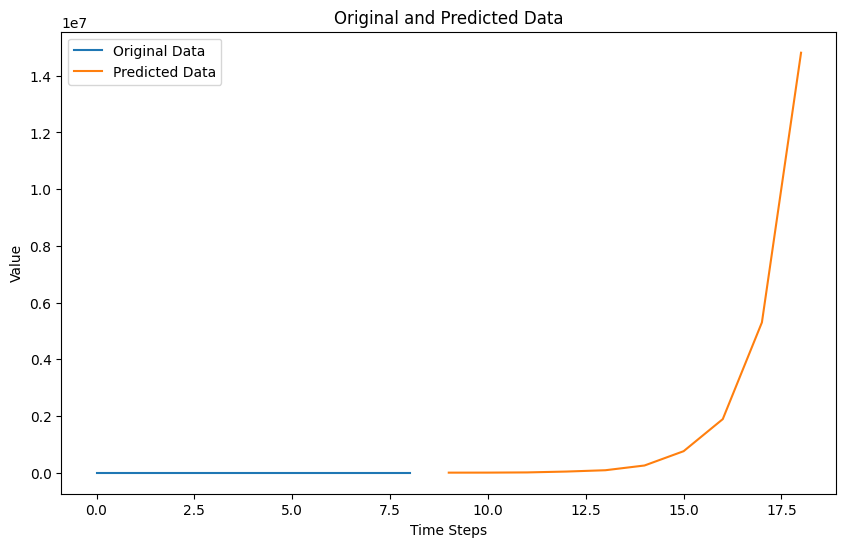

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(timeseries_data, label='Original Data')
plt.plot(range(len(timeseries_data), len(timeseries_data) + len(lst_output)), lst_output, label='Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Original and Predicted Data')
plt.legend()
plt.show()

# *** Time series data 2***

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate time series data
months = 60
time = np.arange(1, months + 1)

# Trend component (linear increase)
trend = 0.5 * time
seasonal_period = 12
seasonal = 10 * np.sin(2 * np.pi * time / seasonal_period)
noise = np.random.normal(0, 2, months)
sales = trend + seasonal + noise
data = pd.DataFrame({'Month': time, 'Sales': sales})

In [154]:
def data_prepreation(timeseries,n_features):
  x,y=[],[]
  for i in range(len(timeseries)):
    end=i+n_features
    if end > len(timeseries)-1:
      break
    seqx,seqy=timeseries[i:end],timeseries[end]
    x.append(seqx)
    y.append(seqy)
  return np.array(x),np.array(y)

In [155]:
data.tail()

,Month,Sales
55,56,21.202306
56,57,16.821565
57,58,19.721321
58,59,25.162527
59,60,31.951090


In [156]:
data=data.Sales.values

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data.reshape(-1,1)).flatten()

In [158]:
# data=list(data)
n_steps=3

In [159]:
# feature=3
x,y=data_prepreation(data,3)
x=x.reshape((x.shape[0],x.shape[1],1))

In [160]:
print(x.shape)
print(y.shape)

(57, 3, 1)
(57,)


In [161]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [162]:
model=Sequential([
    LSTM(150,activation='relu',return_sequences=True,input_shape=(3,1)),
    Dropout(0.2),
    LSTM(150,activation='relu'),
    Dropout(0,2),
    Dense(1)
])

In [163]:
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error, mean_absolute_error
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
def scheduler(epoch, lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

model.fit(x, y, epochs=300, batch_size=16, verbose=1, callbacks=[lr_scheduler])

Epoch 1/300
4/4 [==============================] - 3s 11ms/step - loss: 0.3040 - accuracy: 0.0175 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2642 - accuracy: 0.0175 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2195 - accuracy: 0.0175 - lr: 0.0010
Epoch 4/300
4/4 [==============================] - 0s 14ms/step - loss: 0.1630 - accuracy: 0.0175 - lr: 0.0010
Epoch 5/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0974 - accuracy: 0.0175 - lr: 0.0010
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0441 - accuracy: 0.0351 - lr: 0.0010
Epoch 7/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0482 - accuracy: 0.0351 - lr: 0.0010
Epoch 8/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0538 - accuracy: 0.0351 - lr: 0.0010
Epoch 9/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.0351 - lr: 0.0010
E

In [164]:
model.evaluate(x,y)

2/2 [==============================] - 0s 10ms/step - loss: 0.0106 - accuracy: 0.0351


[0.010602192021906376, 0.035087719559669495]

In [165]:
x_input = np.array([19.721321, 25.162527, 31.951090])
x_input_scaled = scaler.transform(x_input.reshape(-1, 1)).flatten()
temp_input = list(x_input_scaled)
lst_output = []

i = 0
while i < 10:
    x_input = np.array(temp_input[-n_steps:])
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i += 1

# Inverse transform the predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

# Evaluate the model using relevant metrics
mse = mean_squared_error(sales[-len(lst_output):], lst_output)
rmse = np.sqrt(mse)
mae = mean_absolute_error(sales[-len(lst_output):], lst_output)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(lst_output)

MSE: 36.99599316240285
RMSE: 6.082433161359264
MAE: 4.095375897377361
[31.374056 31.21812  28.52072  26.398632 23.161955 21.054316 18.603182
 17.50279  16.344776 16.259502]


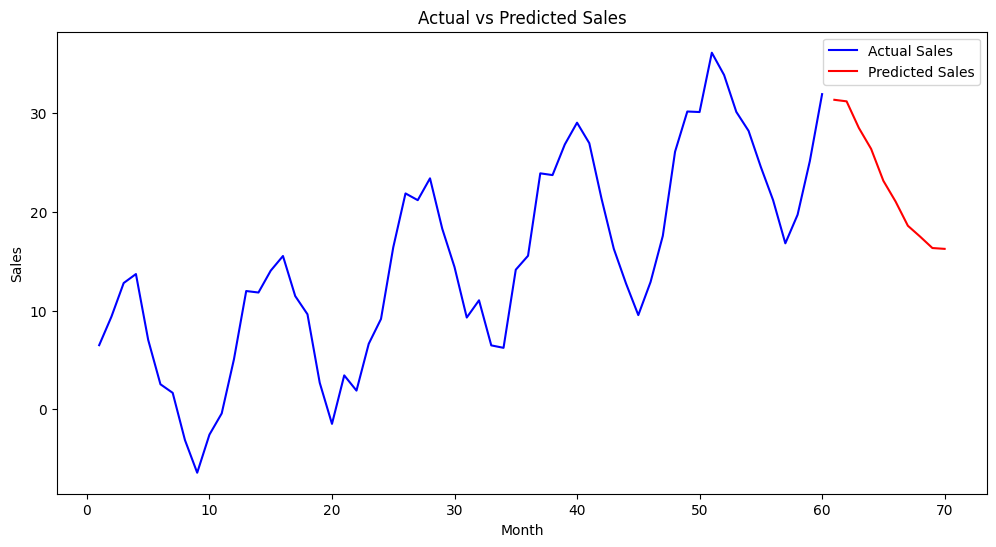

In [166]:
plt.figure(figsize=(12, 6))

plt.plot(time, sales, label='Actual Sales', color='blue')
plt.plot(np.arange(months + 1, months + 11), lst_output, label='Predicted Sales', color='red')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# ***Time series data 3***

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate synthetic sales data
def generate_sales_data(days):
    np.random.seed(42)  # For reproducibility
    trend = np.linspace(20, 50, days)  # Linear trend
    seasonal = 10 * np.sin(np.linspace(0, 3 * np.pi, days))  # Seasonal component
    noise = np.random.normal(0, 5, days)  # Random noise
    sales = trend + seasonal + noise
    return sales

# Generate sales data for 60 days
days = 60

sales_data = generate_sales_data(days)

In [181]:
sales_data

array([22.48357077, 21.40778803, 27.39615896, 33.75149803, 26.82680502,
       28.5362555 , 39.12993929, 36.38961698, 31.29464506, 37.20059971,
       32.76411341, 33.09141282, 36.71850894, 25.79139911, 26.35957046,
       31.59879936, 28.59943827, 34.34742632, 27.24344764, 23.6624333 ,
       36.96551362, 27.43525836, 27.88247595, 19.49451632, 23.09903437,
       25.74076966, 18.98802682, 26.39418387, 21.51979575, 23.31917389,
       22.27758416, 35.30980385, 26.99058054, 23.01376209, 33.87515246,
       25.30995008, 34.27274472, 25.37360295, 30.56727742, 40.28259291,
       45.09425081, 44.33532468, 44.90981265, 45.88688896, 41.76338977,
       47.14765045, 49.8342675 , 58.59091888, 55.95171235, 46.09650957,
       56.95567697, 53.58101237, 52.04918927, 58.19056175, 59.77719213,
       58.58617588, 48.88941367, 50.57775609, 52.73847754, 54.87772564])

In [182]:
def datanew_prepreation(sales,n_features):
  x,y=[],[]

  for i in range(len(sales)):
    end=i+n_features
    if end > len(sales)-1:
      break
    seqx,seqy=sales[i:end],sales[end]
    x.append(seqx)
    y.append(seqy)
  return np.array(x),np.array(y)

In [183]:
x,y=datanew_prepreation(sales_data,3)

In [184]:
from sklearn.preprocessing import MinMaxScaler
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.reshape(-1, 1))

In [185]:
print(x.shape)
print(y.shape)

(57, 3)
(57, 1)


In [186]:
x=x.reshape(57,3,1)

In [187]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras import Sequential

In [188]:
model=Sequential([
    LSTM(150,activation='relu',return_sequences=True,input_shape=(3,1)),
    Dropout(0.2),
    LSTM(150,activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [189]:
model.compile(optimizer='adam',loss='mse')

In [190]:
def scheduler(epoch, lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [191]:
model.fit(x, y, epochs=300, batch_size=16, verbose=1, callbacks=[lr_scheduler])

Epoch 1/300
4/4 [==============================] - 3s 13ms/step - loss: 0.2630 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 0.2193 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - 0s 17ms/step - loss: 0.1772 - lr: 0.0010
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 0.1232 - lr: 0.0010
Epoch 5/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0651 - lr: 0.0010
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0446 - lr: 0.0010
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0474 - lr: 0.0010
Epoch 8/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0453 - lr: 0.0010
Epoch 9/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0353 - lr: 0.0010
Epoch 10/300
4/4 [==============================] - 0s 15ms/step - loss: 0.0316 - lr: 0.0010
Epoch 11/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0318

In [192]:
model.evaluate(x,y)

2/2 [==============================] - 0s 10ms/step - loss: 0.0180


0.018006600439548492

In [193]:
x_input = np.array([50, 52, 54], dtype=float)
x_input_scaled = scaler.transform(x_input.reshape(-1, 1)).flatten()
temp_input = list(x_input_scaled)
lst_output = []

i = 0
while i < 10:
    x_input = np.array(temp_input[-n_steps:])
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i += 1

# Inverse transform the predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

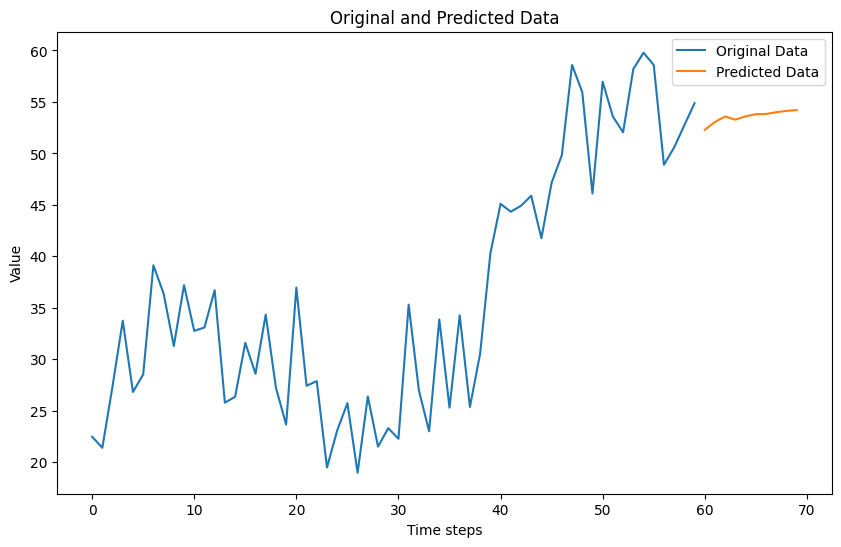

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label='Original Data')
plt.plot(range(len(sales_data), len(sales_data) + len(lst_output)), lst_output, label='Predicted Data')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.title('Original and Predicted Data')
plt.legend()
plt.show()